In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.datasets import *
from sklearn.preprocessing import StandardScaler

In [33]:
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["PRICE"] = data.target

df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [34]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### Linear Regression

In [57]:
clf = LinearRegression(fit_intercept=True).fit(X_train,y_train)
y_pred = clf.predict(X_test)

acc = clf.score(X_test, y_test)
print("Accuracy :",acc)
print("Co-efficient : ",clf.coef_)
print("Intercept : ",clf.intercept_)

Accuracy : 0.7629729981481694
Co-efficient :  [-1.32161196e-01  4.74339813e-02  6.29823617e-02  2.07954372e+00
 -1.93675115e+01  3.92069547e+00  6.12152541e-03 -1.47250822e+00
  3.07158106e-01 -1.21634415e-02 -9.71163393e-01  8.21030222e-03
 -5.45984396e-01]
Intercept :  36.85646010238209


In [50]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 21.56
Coefficient of determination: 0.76


### Plot predictions vs actual

Text(0, 0.5, 'Predicted Values')

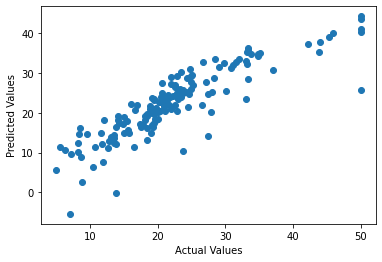

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

### Distribution of errors

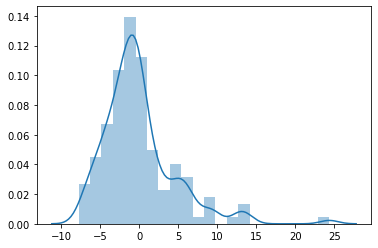

In [58]:
errors = y_test - y_pred
sns.distplot(errors)

Obserations : <br>
+ Most errors are 0 -> good
+ there are more errors on -ve side

### Test with data Standardization

In [74]:
X = StandardScaler().fit_transform(df.iloc[:,:-1])
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

clf = LinearRegression(fit_intercept=True).fit(X_train,y_train)
y_pred = clf.predict(X_test)

acc = clf.score(X_test, y_test)
print("Accuracy :",acc)
print("Co-efficient : ",clf.coef_)
print("Intercept : ",clf.intercept_)

Accuracy : 0.5580978634734177
Co-efficient :  [-1.17628429  0.98368445  0.54578176  0.9687852  -1.55381124  4.24952353
 -0.56200654 -2.5185289   2.12743263 -2.05646293 -1.80869902  1.01744752
 -2.39705674]
Intercept :  22.346159884866974
